In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import logging
import time
import matplotlib.pyplot as plt

### Reading data

In [ ]:
path = "/content/gdrive/MyDrive/Colab Notebooks/Data/"

In [18]:
df=pd.read_csv(path+"data.csv", index_col=0)
df.head()

,bmi,gender,is_training,name
0,34.207396,Male,1,img_0.bmp
1,26.453720,Male,1,img_1.bmp
2,34.967561,Female,1,img_2.bmp
3,22.044766,Female,1,img_3.bmp
4,37.758789,Female,1,img_4.bmp


In [19]:
df.shape

(4206, 4)

In [20]:
# encode gender column to binary
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})

In [21]:
import os
# remove rows that no face images
allimage = os.listdir(path+'Images/')
df = df.loc[df['name'].isin(allimage),:]
df.shape

(3962, 4)

In [22]:
# remove rows with invalid BMI
df = df.loc[~df['bmi'].isnull(), :]

# split train/valid
train_df = df[df['is_training'] == 1].drop(['is_training'], axis=1).reset_index(drop=True)
test_df = df[df['is_training'] == 0].drop(['is_training'], axis=1).reset_index(drop=True)
print('train data dimension: {}'.format(str(train_df.shape)))
print('test data dimension:  {}'.format(str(test_df.shape)))

# output to csv files
train_df.to_csv(path+'Train/train.csv', index = False)
test_df.to_csv(path+'Test/valid.csv', index = False)

train data dimension: (3210, 3)
test data dimension:  (752, 3)


In [23]:
train_df.head()

,bmi,gender,name
0,34.207396,0,img_0.bmp
1,26.453720,0,img_1.bmp
2,34.967561,1,img_2.bmp
3,22.044766,1,img_3.bmp
4,25.845588,1,img_6.bmp


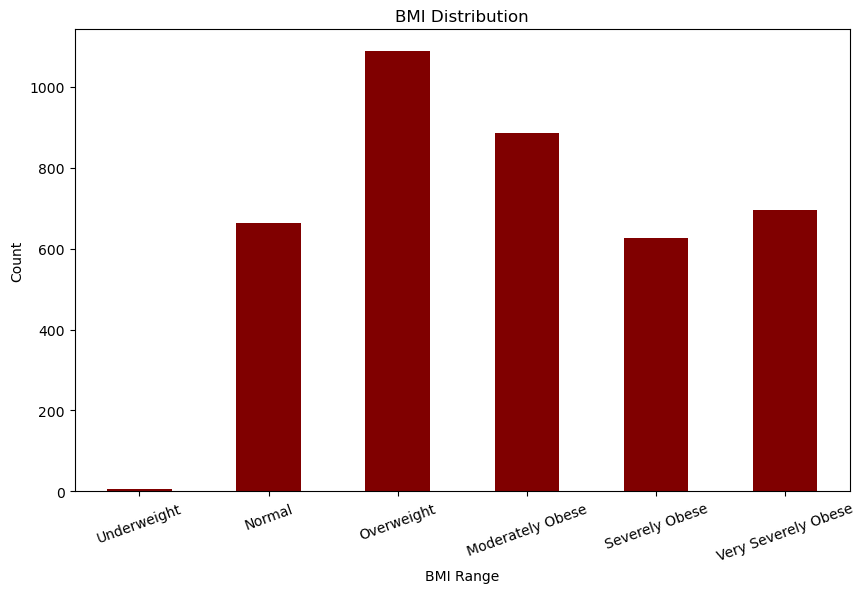

In [24]:
# Define the BMI ranges and corresponding labels
bins = [16, 18.5, 25, 30, 35, 40, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Moderately Obese', 'Severely Obese', 'Very Severely Obese']

# Compute the count of BMI values in each range
bmi_counts = pd.cut(df['bmi'], bins=bins, labels=labels).value_counts().sort_index()

# Plot the chart
ax = bmi_counts.plot(kind='bar', figsize=(10, 6), xlabel='BMI Range', ylabel='Count', title='BMI Distribution', color='maroon')
ax.set_xticklabels(labels, rotation=20)  # Set x-tick labels rotation to 0 degrees

# Show the chart
plt.show()


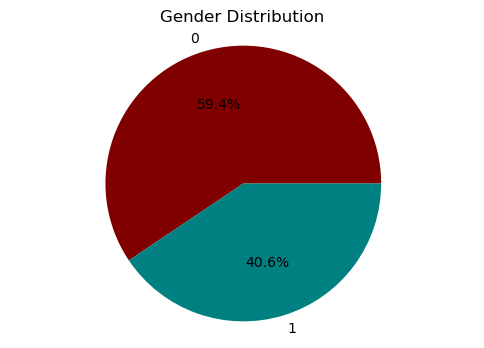

In [25]:
# Compute the count and percentage of each gender
gender_counts = df['gender'].value_counts()
gender_percentages = gender_counts / gender_counts.sum() * 100

# Create the pie chart
fig, ax = plt.subplots(figsize=(6, 4))
colors = ['maroon', 'teal']

ax.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', colors=colors)


# Set the aspect ratio to be equal so the pie is circular
ax.axis('equal')

# Set the title of the chart
ax.set_title('Gender Distribution')

# Display the chart
plt.show()


In [ ]:
import shutil

# Source folder path
source_folder = path+'Images/'

# Destination folder path
destination_folder = path+'Test/Test_Img/'

# List of file names
test_file_list = test_df.name.to_list()

# Copy files from source to destination
_ = [shutil.copy(os.path.join(source_folder, file_name), destination_folder) for file_name in test_file_list]


train_file_list = train_df.name.to_list()
destination_folder = path+'Train/Train_Img/'
_ = [shutil.copy(os.path.join(source_folder, file_name), destination_folder) for file_name in train_file_list]


In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 39.3 MB/s eta 0:00:00


### Testing MTCNN

In [ ]:
from mtcnn.mtcnn import MTCNN
import cv2
import os

test_dir = path+'Test/Test_Img/'
train_dir = path+'Train/Train_Img/'
test_processed_dir = path+'Test/test_aligned/'
train_processed_dir = path+'Train/train_aligned/'

single_test = path+'single_face/'
os.listdir(single_test)

['barack-obama.jpg',
 'bill-gates.jpg',
 'emma_watson.jpg',
 'hilary_clinton.jpg',
 'leonardo.jpeg',
 'trump.jpg',
 'xi.jpg',
 '.ipynb_checkpoints']

In [ ]:
img = cv2.cvtColor(cv2.imread(single_test + 'trump.jpg'), cv2.COLOR_BGR2RGB)
detector = MTCNN()
box = detector.detect_faces(img)[0]
print(box)

1/1 [==============================] - 0s 290ms/step
{'box': [355, 75, 266, 347], 'confidence': 0.9983004927635193, 'keypoints': {'left_eye': (432, 209), 'right_eye': (551, 208), 'nose': (492, 276), 'mouth_left': (445, 346), 'mouth_right': (544, 347)}}


In [ ]:
#https://shubhasmitaroy.medium.com/for-those-who-get-an-error-on-importing-vggface-related-packages-e5afdd0c3f01
!pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install keras_applications --no-deps
filename = "/usr/local/lib/python3.10/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-vzpmeic4
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-vzpmeic4
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8298 sha256=d7cdc0cff60d0cc03404fb44521ec12938e464f7a0b22e9922a04edffe9866a6
  Stored in directory: /tmp/pip-ephem-wheel-cache-uukhz5se/wheels/62/cd/e0/3a2d2fe84d014324aed54d420cab52df65a774d9b296c63996
Successfully built keras-vggface
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
from keras_vggface import utils
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

def crop_img(im,x,y,w,h):
    return im[y:(y+h),x:(x+w),:]

def detect_face(face_path):
    img = cv2.cvtColor(cv2.imread(face_path), cv2.COLOR_BGR2RGB)
    box = detector.detect_faces(img)
    return box

def cut_negative_boundary(box):
    res = []
    for x in box['box']:
        if x < 0:
            x = 0
        res.append(x)
    box['box'] = res
    return box

def detect_faces(face_path):
    img = load_img(face_path)
    img = img_to_array(img)
    box = detector.detect_faces(img)
    return box

def draw_box(face_path = './test/trump.jpg', plot = True):
    boxes = detect_faces(face_path)
    im = np.array(Image.open(face_path), dtype=np.uint8)
    
    if plot:
        # Create figure and axes
        num_box = len(boxes)
        fig,ax = plt.subplots(1, (1 + num_box))
        fig.set_size_inches(4 * (1 + num_box),4)
        # Display the image
        ax[0].imshow(im)
        ax[0].axis('off')
        # Create a Rectangle patch
        for idx, box in enumerate(boxes):
            box_x, box_y, box_w, box_h = box['box']
            rect = patches.Rectangle((box_x, box_y), box_w, box_h, linewidth=1,edgecolor='r',facecolor='none')
            ax[0].add_patch(rect)
            ax[0].text(box_x, box_y, '{:3.2f}'.format(box['confidence']))
            for i in box['keypoints'].keys():
                circle = patches.Circle(box['keypoints'][i], radius = 5, color = 'red')
                ax[0].add_patch(circle)
            ax[1 + idx].imshow(crop_img(im, *box['box']))
            ax[1 + idx].axis('off')
        plt.show()
    
    res = [crop_img(im, *box['box']) for box in boxes]
    
    return res

1/1 [==============================] - 0s 31ms/step


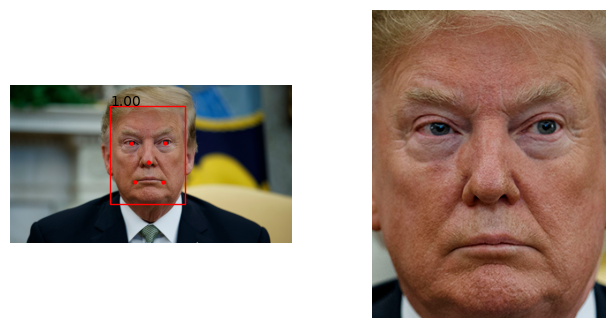

In [ ]:
res = draw_box(single_test + 'trump.jpg')

1/1 [==============================] - 0s 35ms/step


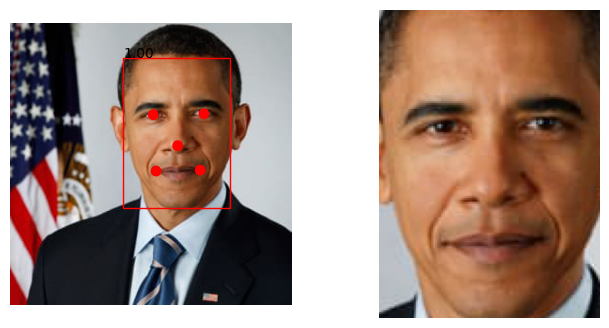

1/1 [==============================] - 0s 40ms/step


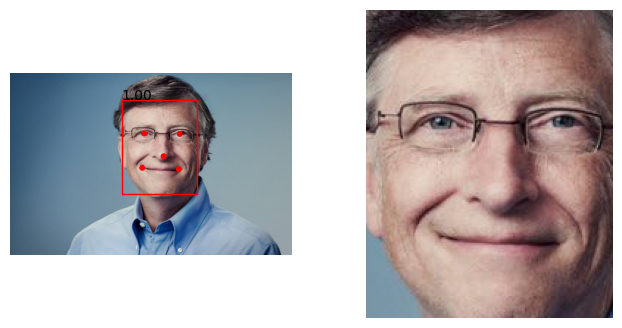

1/1 [==============================] - 0s 48ms/step


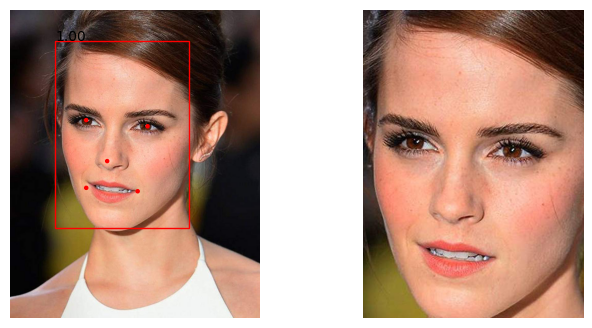

In [ ]:
for img in os.listdir(single_test)[:3]:
    draw_box(single_test + img)


### Crop and save all test images using MTCNN

In [ ]:
##Process Cropping For All test Faces

from tqdm import tqdm
import shutil
if os.path.exists(test_processed_dir):
    shutil.rmtree(test_processed_dir)
os.mkdir(test_processed_dir)
for img in tqdm(os.listdir(test_dir)):
    box = detect_face(test_dir+img)
    if len(box) >0:
      box = box[0]
      im = plt.imread(test_dir+img)
      cropped = crop_img(im, *box['box'])
      contiguous_img = np.ascontiguousarray(cropped)
      plt.imsave(test_processed_dir + img, contiguous_img)

  0%|          | 0/752 [00:00<?, ?it/s]

1/1 [==============================] - 0s 41ms/step


  0%|          | 1/752 [00:01<15:04,  1.20s/it]

1/1 [==============================] - 0s 31ms/step


  0%|          | 2/752 [00:02<13:25,  1.07s/it]

1/1 [==============================] - 0s 36ms/step


  0%|          | 3/752 [00:03<12:57,  1.04s/it]

1/1 [==============================] - 0s 32ms/step


  1%|          | 4/752 [00:03<11:29,  1.08it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 5/752 [00:04<10:46,  1.16it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 6/752 [00:05<12:13,  1.02it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 7/752 [00:06<12:14,  1.01it/s]

1/1 [==============================] - 0s 63ms/step


  1%|          | 8/752 [00:08<14:23,  1.16s/it]

1/1 [==============================] - 0s 70ms/step


  1%|          | 9/752 [00:09<14:17,  1.15s/it]

1/1 [==============================] - 0s 73ms/step


  1%|▏         | 10/752 [00:10<15:17,  1.24s/it]

1/1 [==============================] - 0s 40ms/step


  1%|▏         | 11/752 [00:12<15:28,  1.25s/it]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 12/752 [00:13<15:49,  1.28s/it]

1/1 [==============================] - 0s 31ms/step


  2%|▏         | 13/752 [00:15<16:12,  1.32s/it]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 14/752 [00:15<13:51,  1.13s/it]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 15/752 [00:16<12:16,  1.00it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 16/752 [00:17<14:14,  1.16s/it]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 17/752 [00:18<12:45,  1.04s/it]

1/1 [==============================] - 0s 31ms/step


  2%|▏         | 18/752 [00:19<12:00,  1.02it/s]

1/1 [==============================] - 0s 41ms/step


  3%|▎         | 19/752 [00:20<12:09,  1.00it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 20/752 [00:21<11:50,  1.03it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 21/752 [00:22<13:44,  1.13s/it]

1/1 [==============================] - 0s 54ms/step


  3%|▎         | 22/752 [00:25<20:18,  1.67s/it]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 23/752 [00:28<23:14,  1.91s/it]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 24/752 [00:29<20:47,  1.71s/it]

1/1 [==============================] - 0s 30ms/step


  3%|▎         | 25/752 [00:30<18:58,  1.57s/it]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 26/752 [00:31<17:13,  1.42s/it]

1/1 [==============================] - 0s 38ms/step


  4%|▎         | 27/752 [00:32<15:11,  1.26s/it]

1/1 [==============================] - 0s 27ms/step


  4%|▎         | 28/752 [00:33<13:35,  1.13s/it]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 29/752 [00:34<12:12,  1.01s/it]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 30/752 [00:35<11:37,  1.03it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 31/752 [00:36<11:31,  1.04it/s]

1/1 [==============================] - 0s 51ms/step


  4%|▍         | 32/752 [00:37<13:44,  1.15s/it]

1/1 [==============================] - 0s 64ms/step


  4%|▍         | 33/752 [00:39<16:03,  1.34s/it]

1/1 [==============================] - 0s 51ms/step


  5%|▍         | 34/752 [00:41<17:57,  1.50s/it]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 35/752 [00:42<16:58,  1.42s/it]

1/1 [==============================] - 0s 32ms/step


  5%|▍         | 36/752 [00:43<15:32,  1.30s/it]

1/1 [==============================] - 0s 32ms/step


  5%|▍         | 37/752 [00:44<14:16,  1.20s/it]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 38/752 [00:45<13:32,  1.14s/it]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 39/752 [00:46<12:33,  1.06s/it]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 40/752 [00:47<13:26,  1.13s/it]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 41/752 [00:49<14:04,  1.19s/it]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 42/752 [00:50<13:47,  1.17s/it]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 43/752 [00:51<12:33,  1.06s/it]

1/1 [==============================] - 0s 60ms/step


  6%|▌         | 44/752 [00:52<12:16,  1.04s/it]

1/1 [==============================] - 0s 51ms/step


  6%|▌         | 45/752 [00:53<12:50,  1.09s/it]

1/1 [==============================] - 0s 50ms/step


  6%|▌         | 46/752 [00:54<12:36,  1.07s/it]

1/1 [==============================] - 0s 48ms/step


  6%|▋         | 47/752 [00:55<12:31,  1.07s/it]

1/1 [==============================] - 0s 31ms/step


  6%|▋         | 48/752 [00:56<12:46,  1.09s/it]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 49/752 [00:57<12:36,  1.08s/it]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 50/752 [00:58<12:43,  1.09s/it]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 51/752 [00:59<12:30,  1.07s/it]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 52/752 [01:01<13:17,  1.14s/it]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 53/752 [01:02<14:57,  1.28s/it]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 54/752 [01:03<14:23,  1.24s/it]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 55/752 [01:04<13:49,  1.19s/it]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 56/752 [01:05<11:53,  1.03s/it]

1/1 [==============================] - 0s 62ms/step


  8%|▊         | 57/752 [01:06<10:47,  1.07it/s]

1/1 [==============================] - 0s 60ms/step


  8%|▊         | 58/752 [01:07<10:58,  1.05it/s]

1/1 [==============================] - 0s 54ms/step


  8%|▊         | 59/752 [01:08<11:22,  1.02it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 60/752 [01:10<14:05,  1.22s/it]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 61/752 [01:11<14:40,  1.27s/it]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 62/752 [01:12<12:59,  1.13s/it]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 63/752 [01:13<12:09,  1.06s/it]

1/1 [==============================] - 0s 29ms/step


  9%|▊         | 64/752 [01:14<14:01,  1.22s/it]

1/1 [==============================] - 0s 30ms/step


  9%|▊         | 65/752 [01:16<14:56,  1.30s/it]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 66/752 [01:18<16:35,  1.45s/it]

1/1 [==============================] - 0s 30ms/step


  9%|▉         | 67/752 [01:19<17:12,  1.51s/it]

1/1 [==============================] - 0s 49ms/step


  9%|▉         | 68/752 [01:20<15:38,  1.37s/it]

1/1 [==============================] - 0s 53ms/step


  9%|▉         | 69/752 [01:21<14:25,  1.27s/it]

1/1 [==============================] - 0s 50ms/step


  9%|▉         | 70/752 [01:22<14:11,  1.25s/it]

1/1 [==============================] - 0s 51ms/step


  9%|▉         | 71/752 [01:24<13:51,  1.22s/it]

1/1 [==============================] - 0s 36ms/step


 10%|▉         | 72/752 [01:25<15:23,  1.36s/it]

1/1 [==============================] - 0s 30ms/step


 10%|▉         | 73/752 [01:27<15:19,  1.35s/it]

1/1 [==============================] - 0s 28ms/step


 10%|▉         | 74/752 [01:28<14:17,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 75/752 [01:29<13:45,  1.22s/it]

1/1 [==============================] - 0s 37ms/step


 10%|█         | 76/752 [01:30<13:17,  1.18s/it]

1/1 [==============================] - 0s 40ms/step


 10%|█         | 77/752 [01:31<12:51,  1.14s/it]

1/1 [==============================] - 0s 32ms/step


 10%|█         | 78/752 [01:32<11:40,  1.04s/it]

1/1 [==============================] - 0s 47ms/step


 11%|█         | 79/752 [01:33<11:17,  1.01s/it]

1/1 [==============================] - 0s 68ms/step


 11%|█         | 80/752 [01:35<16:13,  1.45s/it]

1/1 [==============================] - 0s 57ms/step


 11%|█         | 81/752 [01:37<18:58,  1.70s/it]

1/1 [==============================] - 0s 46ms/step


 11%|█         | 82/752 [01:39<18:53,  1.69s/it]

1/1 [==============================] - 0s 45ms/step


 11%|█         | 83/752 [01:40<16:39,  1.49s/it]

1/1 [==============================] - 0s 42ms/step


 11%|█         | 84/752 [01:41<14:45,  1.33s/it]

1/1 [==============================] - 0s 35ms/step


 11%|█▏        | 85/752 [01:42<13:27,  1.21s/it]

1/1 [==============================] - 0s 32ms/step


 11%|█▏        | 86/752 [01:44<14:55,  1.34s/it]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 87/752 [01:45<15:53,  1.43s/it]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 88/752 [01:46<13:56,  1.26s/it]

1/1 [==============================] - 0s 32ms/step


 12%|█▏        | 89/752 [01:47<12:30,  1.13s/it]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 90/752 [01:48<11:12,  1.02s/it]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 91/752 [01:48<09:25,  1.17it/s]

1/1 [==============================] - 0s 55ms/step


 12%|█▏        | 92/752 [01:50<10:53,  1.01it/s]

1/1 [==============================] - 0s 66ms/step


 12%|█▏        | 93/752 [01:51<11:45,  1.07s/it]

1/1 [==============================] - 0s 43ms/step


 12%|█▎        | 94/752 [01:52<12:01,  1.10s/it]

1/1 [==============================] - 0s 51ms/step


 13%|█▎        | 95/752 [01:53<12:20,  1.13s/it]

1/1 [==============================] - 0s 31ms/step


 13%|█▎        | 96/752 [01:54<12:16,  1.12s/it]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 97/752 [01:55<11:24,  1.04s/it]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 98/752 [01:56<10:42,  1.02it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 99/752 [01:57<10:27,  1.04it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 100/752 [01:58<10:40,  1.02it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 101/752 [01:59<10:44,  1.01it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▎        | 102/752 [02:00<10:02,  1.08it/s]

1/1 [==============================] - 0s 45ms/step


 14%|█▎        | 103/752 [02:00<09:30,  1.14it/s]

1/1 [==============================] - 0s 42ms/step


 14%|█▍        | 104/752 [02:01<09:44,  1.11it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█▍        | 105/752 [02:02<10:04,  1.07it/s]

1/1 [==============================] - 0s 68ms/step


 14%|█▍        | 106/752 [02:04<11:34,  1.07s/it]

1/1 [==============================] - 0s 60ms/step


 14%|█▍        | 107/752 [02:05<12:25,  1.16s/it]

1/1 [==============================] - 0s 40ms/step


 14%|█▍        | 108/752 [02:07<14:24,  1.34s/it]

1/1 [==============================] - 0s 50ms/step


 14%|█▍        | 109/752 [02:09<15:39,  1.46s/it]

1/1 [==============================] - 0s 35ms/step


 15%|█▍        | 110/752 [02:10<13:46,  1.29s/it]

1/1 [==============================] - 0s 38ms/step


 15%|█▍        | 111/752 [02:10<12:21,  1.16s/it]

1/1 [==============================] - 0s 36ms/step


 15%|█▍        | 112/752 [02:11<11:41,  1.10s/it]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 113/752 [02:12<11:13,  1.05s/it]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 114/752 [02:13<10:47,  1.01s/it]

1/1 [==============================] - 0s 32ms/step


 15%|█▌        | 115/752 [02:14<10:22,  1.02it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▌        | 116/752 [02:16<12:10,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 16%|█▌        | 117/752 [02:17<13:16,  1.25s/it]

1/1 [==============================] - 0s 36ms/step


 16%|█▌        | 118/752 [02:18<10:58,  1.04s/it]

1/1 [==============================] - 0s 56ms/step


 16%|█▌        | 119/752 [02:18<10:08,  1.04it/s]

1/1 [==============================] - 0s 57ms/step


 16%|█▌        | 120/752 [02:21<14:00,  1.33s/it]

1/1 [==============================] - 0s 49ms/step


 16%|█▌        | 121/752 [02:22<13:35,  1.29s/it]

1/1 [==============================] - 0s 37ms/step


 16%|█▌        | 122/752 [02:23<12:50,  1.22s/it]

1/1 [==============================] - 0s 36ms/step


 16%|█▋        | 123/752 [02:24<12:14,  1.17s/it]

1/1 [==============================] - 0s 30ms/step


 16%|█▋        | 124/752 [02:25<11:56,  1.14s/it]

1/1 [==============================] - 0s 36ms/step


 17%|█▋        | 125/752 [02:26<12:51,  1.23s/it]

1/1 [==============================] - 0s 36ms/step


 17%|█▋        | 126/752 [02:28<13:49,  1.33s/it]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 127/752 [02:29<12:31,  1.20s/it]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 128/752 [02:30<11:35,  1.11s/it]

1/1 [==============================] - 0s 43ms/step


 17%|█▋        | 129/752 [02:31<10:24,  1.00s/it]

1/1 [==============================] - 0s 38ms/step


 17%|█▋        | 130/752 [02:31<09:20,  1.11it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 131/752 [02:32<09:14,  1.12it/s]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 132/752 [02:33<08:52,  1.16it/s]

1/1 [==============================] - 0s 55ms/step


 18%|█▊        | 133/752 [02:34<10:31,  1.02s/it]

1/1 [==============================] - 0s 58ms/step


 18%|█▊        | 134/752 [02:36<11:31,  1.12s/it]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 135/752 [02:37<11:43,  1.14s/it]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 136/752 [02:38<11:51,  1.16s/it]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 137/752 [02:39<12:18,  1.20s/it]

1/1 [==============================] - 0s 31ms/step


 18%|█▊        | 138/752 [02:40<11:57,  1.17s/it]

1/1 [==============================] - 0s 33ms/step


 18%|█▊        | 139/752 [02:41<10:22,  1.02s/it]

1/1 [==============================] - 0s 28ms/step


 19%|█▊        | 140/752 [02:42<10:00,  1.02it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 141/752 [02:43<11:20,  1.11s/it]

1/1 [==============================] - 0s 41ms/step


 19%|█▉        | 142/752 [02:45<12:52,  1.27s/it]

1/1 [==============================] - 0s 35ms/step


 19%|█▉        | 143/752 [02:46<11:12,  1.10s/it]

1/1 [==============================] - 0s 33ms/step


 19%|█▉        | 144/752 [02:46<09:46,  1.04it/s]

1/1 [==============================] - 0s 53ms/step


 19%|█▉        | 145/752 [02:48<11:57,  1.18s/it]

1/1 [==============================] - 0s 37ms/step


 19%|█▉        | 146/752 [02:50<14:32,  1.44s/it]

1/1 [==============================] - 0s 50ms/step


 20%|█▉        | 147/752 [02:52<16:37,  1.65s/it]

1/1 [==============================] - 0s 32ms/step


 20%|█▉        | 148/752 [02:53<14:55,  1.48s/it]

1/1 [==============================] - 0s 36ms/step


 20%|█▉        | 149/752 [02:55<14:17,  1.42s/it]

1/1 [==============================] - 0s 41ms/step


 20%|█▉        | 150/752 [02:56<14:18,  1.43s/it]

1/1 [==============================] - 0s 33ms/step


 20%|██        | 151/752 [02:57<12:36,  1.26s/it]

1/1 [==============================] - 0s 31ms/step


 20%|██        | 152/752 [02:58<10:42,  1.07s/it]

1/1 [==============================] - 0s 35ms/step


 20%|██        | 153/752 [02:58<09:35,  1.04it/s]

1/1 [==============================] - 0s 31ms/step


 20%|██        | 154/752 [02:59<08:41,  1.15it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 155/752 [03:00<07:46,  1.28it/s]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 156/752 [03:00<07:05,  1.40it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 157/752 [03:01<07:56,  1.25it/s]

1/1 [==============================] - 0s 44ms/step


 21%|██        | 158/752 [03:02<09:18,  1.06it/s]

1/1 [==============================] - 0s 47ms/step


 21%|██        | 159/752 [03:04<10:12,  1.03s/it]

1/1 [==============================] - 0s 48ms/step


 21%|██▏       | 160/752 [03:05<10:41,  1.08s/it]

1/1 [==============================] - 0s 54ms/step


 21%|██▏       | 161/752 [03:06<10:25,  1.06s/it]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 162/752 [03:07<10:10,  1.03s/it]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 163/752 [03:08<11:09,  1.14s/it]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 164/752 [03:10<12:03,  1.23s/it]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 165/752 [03:10<10:58,  1.12s/it]

1/1 [==============================] - 0s 33ms/step


 22%|██▏       | 166/752 [03:11<10:20,  1.06s/it]

1/1 [==============================] - 0s 36ms/step


 22%|██▏       | 167/752 [03:13<10:31,  1.08s/it]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 168/752 [03:14<12:34,  1.29s/it]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 169/752 [03:15<11:43,  1.21s/it]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 170/752 [03:16<10:52,  1.12s/it]

1/1 [==============================] - 0s 76ms/step


 23%|██▎       | 171/752 [03:19<15:14,  1.57s/it]

1/1 [==============================] - 0s 42ms/step


 23%|██▎       | 172/752 [03:22<18:22,  1.90s/it]

1/1 [==============================] - 0s 36ms/step


 23%|██▎       | 173/752 [03:22<15:35,  1.61s/it]

1/1 [==============================] - 0s 34ms/step


 23%|██▎       | 174/752 [03:23<13:23,  1.39s/it]

1/1 [==============================] - 0s 36ms/step


 23%|██▎       | 175/752 [03:24<12:34,  1.31s/it]

1/1 [==============================] - 0s 31ms/step


 23%|██▎       | 176/752 [03:25<11:38,  1.21s/it]

1/1 [==============================] - 0s 31ms/step


 24%|██▎       | 177/752 [03:27<11:14,  1.17s/it]

1/1 [==============================] - 0s 26ms/step


 24%|██▎       | 178/752 [03:28<10:50,  1.13s/it]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 179/752 [03:29<10:26,  1.09s/it]

1/1 [==============================] - 0s 37ms/step


 24%|██▍       | 180/752 [03:30<10:11,  1.07s/it]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 181/752 [03:30<09:19,  1.02it/s]

1/1 [==============================] - 0s 57ms/step


 24%|██▍       | 182/752 [03:31<08:59,  1.06it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 183/752 [03:33<09:57,  1.05s/it]

1/1 [==============================] - 0s 56ms/step


 24%|██▍       | 184/752 [03:34<10:41,  1.13s/it]

1/1 [==============================] - 0s 39ms/step


 25%|██▍       | 185/752 [03:36<14:23,  1.52s/it]

1/1 [==============================] - 0s 33ms/step


 25%|██▍       | 186/752 [03:38<14:30,  1.54s/it]

1/1 [==============================] - 0s 35ms/step


 25%|██▍       | 187/752 [03:39<11:59,  1.27s/it]

1/1 [==============================] - 0s 38ms/step


 25%|██▌       | 188/752 [03:39<10:16,  1.09s/it]

1/1 [==============================] - 0s 40ms/step


 25%|██▌       | 189/752 [03:40<10:36,  1.13s/it]

1/1 [==============================] - 0s 37ms/step


 25%|██▌       | 190/752 [03:42<10:42,  1.14s/it]

1/1 [==============================] - 0s 29ms/step


 25%|██▌       | 191/752 [03:42<09:52,  1.06s/it]

1/1 [==============================] - 0s 40ms/step


 26%|██▌       | 192/752 [03:43<09:08,  1.02it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██▌       | 193/752 [03:44<09:11,  1.01it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██▌       | 194/752 [03:45<09:10,  1.01it/s]

1/1 [==============================] - 0s 56ms/step


 26%|██▌       | 195/752 [03:46<09:04,  1.02it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▌       | 196/752 [03:48<10:20,  1.12s/it]

1/1 [==============================] - 0s 54ms/step


 26%|██▌       | 197/752 [03:49<11:00,  1.19s/it]

1/1 [==============================] - 0s 51ms/step


 26%|██▋       | 198/752 [03:50<10:03,  1.09s/it]

1/1 [==============================] - 0s 34ms/step


 26%|██▋       | 199/752 [03:52<11:45,  1.28s/it]

1/1 [==============================] - 0s 45ms/step


 27%|██▋       | 200/752 [03:53<11:59,  1.30s/it]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 201/752 [03:53<09:55,  1.08s/it]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 202/752 [03:54<08:39,  1.06it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 203/752 [03:55<09:08,  1.00it/s]

1/1 [==============================] - 0s 40ms/step


 27%|██▋       | 204/752 [03:57<10:33,  1.16s/it]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 205/752 [03:58<12:03,  1.32s/it]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 206/752 [04:00<11:30,  1.26s/it]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 207/752 [04:01<11:28,  1.26s/it]

1/1 [==============================] - 0s 66ms/step


 28%|██▊       | 208/752 [04:02<12:00,  1.32s/it]

1/1 [==============================] - 0s 61ms/step


 28%|██▊       | 209/752 [04:04<11:45,  1.30s/it]

1/1 [==============================] - 0s 58ms/step


 28%|██▊       | 210/752 [04:05<11:30,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 211/752 [04:06<11:37,  1.29s/it]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 212/752 [04:07<11:16,  1.25s/it]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 213/752 [04:08<11:02,  1.23s/it]

1/1 [==============================] - 0s 46ms/step


 28%|██▊       | 214/752 [04:10<11:28,  1.28s/it]

1/1 [==============================] - 0s 31ms/step


 29%|██▊       | 215/752 [04:11<10:47,  1.21s/it]

1/1 [==============================] - 0s 31ms/step


 29%|██▊       | 216/752 [04:12<10:35,  1.19s/it]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 217/752 [04:13<11:09,  1.25s/it]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 218/752 [04:15<11:31,  1.29s/it]

1/1 [==============================] - 0s 57ms/step


 29%|██▉       | 219/752 [04:16<11:39,  1.31s/it]

1/1 [==============================] - 0s 44ms/step


 29%|██▉       | 220/752 [04:18<13:00,  1.47s/it]

1/1 [==============================] - 0s 53ms/step


 29%|██▉       | 221/752 [04:20<13:15,  1.50s/it]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 222/752 [04:21<12:43,  1.44s/it]

1/1 [==============================] - 0s 31ms/step


 30%|██▉       | 223/752 [04:22<12:23,  1.41s/it]

1/1 [==============================] - 0s 39ms/step


 30%|██▉       | 224/752 [04:23<11:59,  1.36s/it]

1/1 [==============================] - 0s 31ms/step


 30%|██▉       | 225/752 [04:24<10:38,  1.21s/it]

1/1 [==============================] - 0s 30ms/step


 30%|███       | 226/752 [04:25<09:21,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 30%|███       | 227/752 [04:26<09:49,  1.12s/it]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 228/752 [04:27<09:33,  1.09s/it]

1/1 [==============================] - 0s 32ms/step


 30%|███       | 229/752 [04:28<09:19,  1.07s/it]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 230/752 [04:29<08:29,  1.02it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███       | 231/752 [04:30<08:30,  1.02it/s]

1/1 [==============================] - 0s 51ms/step


 31%|███       | 232/752 [04:31<09:22,  1.08s/it]

1/1 [==============================] - 0s 52ms/step


 31%|███       | 233/752 [04:33<10:34,  1.22s/it]

1/1 [==============================] - 0s 55ms/step


 31%|███       | 234/752 [04:35<11:25,  1.32s/it]

1/1 [==============================] - 0s 29ms/step


 31%|███▏      | 235/752 [04:35<10:21,  1.20s/it]

1/1 [==============================] - 0s 29ms/step


 31%|███▏      | 236/752 [04:36<09:42,  1.13s/it]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 237/752 [04:37<08:58,  1.05s/it]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 238/752 [04:38<08:14,  1.04it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 239/752 [04:39<08:46,  1.03s/it]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 240/752 [04:40<08:55,  1.05s/it]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 241/752 [04:41<08:35,  1.01s/it]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 242/752 [04:42<08:17,  1.02it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 243/752 [04:43<08:21,  1.02it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 244/752 [04:44<08:24,  1.01it/s]

1/1 [==============================] - 0s 45ms/step


 33%|███▎      | 245/752 [04:46<09:50,  1.17s/it]

1/1 [==============================] - 0s 58ms/step


 33%|███▎      | 246/752 [04:48<12:18,  1.46s/it]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 247/752 [04:49<12:22,  1.47s/it]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 248/752 [04:51<11:39,  1.39s/it]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 249/752 [04:51<10:15,  1.22s/it]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 250/752 [04:52<09:18,  1.11s/it]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 251/752 [04:54<11:33,  1.38s/it]

1/1 [==============================] - 0s 49ms/step


 34%|███▎      | 252/752 [04:56<12:04,  1.45s/it]

1/1 [==============================] - 0s 53ms/step


 34%|███▎      | 253/752 [04:57<11:43,  1.41s/it]

1/1 [==============================] - 0s 47ms/step


 34%|███▍      | 254/752 [04:59<11:59,  1.45s/it]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 255/752 [05:00<11:12,  1.35s/it]

1/1 [==============================] - 0s 69ms/step


 34%|███▍      | 256/752 [05:01<11:27,  1.39s/it]

1/1 [==============================] - 0s 50ms/step


 34%|███▍      | 257/752 [05:04<14:56,  1.81s/it]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 258/752 [05:06<15:00,  1.82s/it]

1/1 [==============================] - 0s 54ms/step


 34%|███▍      | 259/752 [05:07<12:07,  1.47s/it]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 260/752 [05:07<10:19,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 261/752 [05:08<09:17,  1.13s/it]

1/1 [==============================] - 0s 41ms/step


 35%|███▍      | 262/752 [05:09<08:39,  1.06s/it]

1/1 [==============================] - 0s 31ms/step


 35%|███▍      | 263/752 [05:10<08:22,  1.03s/it]

1/1 [==============================] - 0s 27ms/step


 35%|███▌      | 264/752 [05:11<07:41,  1.06it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 265/752 [05:12<09:25,  1.16s/it]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 266/752 [05:13<08:54,  1.10s/it]

1/1 [==============================] - 0s 51ms/step


 36%|███▌      | 267/752 [05:15<09:20,  1.16s/it]

1/1 [==============================] - 0s 56ms/step


 36%|███▌      | 268/752 [05:16<09:01,  1.12s/it]

1/1 [==============================] - 0s 52ms/step


 36%|███▌      | 269/752 [05:17<08:46,  1.09s/it]

1/1 [==============================] - 0s 50ms/step


 36%|███▌      | 270/752 [05:18<09:56,  1.24s/it]

1/1 [==============================] - 0s 32ms/step


 36%|███▌      | 271/752 [05:20<10:27,  1.31s/it]

1/1 [==============================] - 0s 31ms/step


 36%|███▌      | 272/752 [05:21<11:14,  1.40s/it]

1/1 [==============================] - 0s 33ms/step


 36%|███▋      | 273/752 [05:23<11:39,  1.46s/it]

1/1 [==============================] - 0s 39ms/step


 36%|███▋      | 274/752 [05:24<11:16,  1.42s/it]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 275/752 [05:26<11:07,  1.40s/it]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 276/752 [05:27<09:41,  1.22s/it]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 277/752 [05:27<08:35,  1.09s/it]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 278/752 [05:28<08:01,  1.02s/it]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 279/752 [05:29<07:44,  1.02it/s]

1/1 [==============================] - 0s 61ms/step


 37%|███▋      | 280/752 [05:31<09:12,  1.17s/it]

1/1 [==============================] - 0s 56ms/step


 37%|███▋      | 281/752 [05:33<10:54,  1.39s/it]

1/1 [==============================] - 0s 69ms/step


 38%|███▊      | 282/752 [05:34<09:58,  1.27s/it]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 283/752 [05:34<09:12,  1.18s/it]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 284/752 [05:36<09:04,  1.16s/it]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 285/752 [05:37<09:07,  1.17s/it]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 286/752 [05:38<09:27,  1.22s/it]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 287/752 [05:39<09:41,  1.25s/it]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 288/752 [05:41<10:11,  1.32s/it]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 289/752 [05:42<09:52,  1.28s/it]

1/1 [==============================] - 0s 36ms/step


 39%|███▊      | 290/752 [05:43<09:33,  1.24s/it]

1/1 [==============================] - 0s 49ms/step


 39%|███▊      | 291/752 [05:44<09:08,  1.19s/it]

1/1 [==============================] - 0s 48ms/step


 39%|███▉      | 292/752 [05:46<09:34,  1.25s/it]

1/1 [==============================] - 0s 60ms/step


 39%|███▉      | 293/752 [05:47<09:08,  1.20s/it]

1/1 [==============================] - 0s 52ms/step


 39%|███▉      | 294/752 [05:48<10:09,  1.33s/it]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 295/752 [05:50<10:38,  1.40s/it]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 296/752 [05:51<10:11,  1.34s/it]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 297/752 [05:52<09:39,  1.27s/it]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 298/752 [05:53<08:45,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 40%|███▉      | 299/752 [05:54<08:01,  1.06s/it]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 300/752 [05:55<08:15,  1.10s/it]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 301/752 [05:56<08:25,  1.12s/it]

1/1 [==============================] - 0s 30ms/step


 40%|████      | 302/752 [05:58<08:23,  1.12s/it]

1/1 [==============================] - 0s 30ms/step


 40%|████      | 303/752 [05:59<08:22,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 40%|████      | 304/752 [06:00<09:08,  1.23s/it]

1/1 [==============================] - 0s 55ms/step


 41%|████      | 305/752 [06:02<10:00,  1.34s/it]

1/1 [==============================] - 0s 55ms/step


 41%|████      | 306/752 [06:03<10:48,  1.45s/it]

1/1 [==============================] - 0s 31ms/step


 41%|████      | 307/752 [06:05<10:18,  1.39s/it]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 308/752 [06:06<09:59,  1.35s/it]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 309/752 [06:07<09:34,  1.30s/it]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 310/752 [06:08<08:55,  1.21s/it]

1/1 [==============================] - 0s 36ms/step


 41%|████▏     | 311/752 [06:09<08:36,  1.17s/it]

1/1 [==============================] - 0s 30ms/step


 41%|████▏     | 312/752 [06:11<09:15,  1.26s/it]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 313/752 [06:12<09:17,  1.27s/it]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 314/752 [06:13<08:40,  1.19s/it]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 315/752 [06:14<07:50,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 316/752 [06:15<08:30,  1.17s/it]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 317/752 [06:16<08:46,  1.21s/it]

1/1 [==============================] - 0s 51ms/step


 42%|████▏     | 318/752 [06:18<08:52,  1.23s/it]

1/1 [==============================] - 0s 56ms/step


 42%|████▏     | 319/752 [06:19<08:25,  1.17s/it]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 320/752 [06:20<08:11,  1.14s/it]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 321/752 [06:21<08:06,  1.13s/it]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 322/752 [06:22<08:32,  1.19s/it]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 323/752 [06:24<08:56,  1.25s/it]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 324/752 [06:25<09:34,  1.34s/it]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 325/752 [06:27<10:07,  1.42s/it]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 326/752 [06:28<09:44,  1.37s/it]

1/1 [==============================] - 0s 54ms/step


 43%|████▎     | 327/752 [06:29<09:35,  1.35s/it]

1/1 [==============================] - 0s 56ms/step


 44%|████▎     | 328/752 [06:31<10:58,  1.55s/it]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 329/752 [06:33<11:00,  1.56s/it]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 330/752 [06:35<11:09,  1.59s/it]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 331/752 [06:36<11:08,  1.59s/it]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 332/752 [06:37<10:08,  1.45s/it]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 333/752 [06:39<09:45,  1.40s/it]

1/1 [==============================] - 0s 49ms/step


 44%|████▍     | 334/752 [06:40<09:31,  1.37s/it]

1/1 [==============================] - 0s 43ms/step


 45%|████▍     | 335/752 [06:41<08:52,  1.28s/it]

1/1 [==============================] - 0s 44ms/step


 45%|████▍     | 336/752 [06:42<08:22,  1.21s/it]

1/1 [==============================] - 0s 40ms/step


 45%|████▍     | 337/752 [06:43<08:23,  1.21s/it]

1/1 [==============================] - 0s 49ms/step


 45%|████▍     | 338/752 [06:45<08:51,  1.28s/it]

1/1 [==============================] - 0s 53ms/step


 45%|████▌     | 339/752 [06:46<08:53,  1.29s/it]

1/1 [==============================] - 0s 61ms/step


 45%|████▌     | 340/752 [06:47<08:39,  1.26s/it]

1/1 [==============================] - 0s 52ms/step


 45%|████▌     | 341/752 [06:49<08:43,  1.27s/it]

1/1 [==============================] - 0s 38ms/step


 45%|████▌     | 342/752 [06:50<08:24,  1.23s/it]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 343/752 [06:51<08:13,  1.21s/it]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 344/752 [06:52<07:45,  1.14s/it]

1/1 [==============================] - 0s 41ms/step


 46%|████▌     | 345/752 [06:53<08:06,  1.19s/it]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 346/752 [06:54<08:25,  1.25s/it]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 347/752 [06:56<08:25,  1.25s/it]

1/1 [==============================] - 0s 34ms/step


 46%|████▋     | 348/752 [06:57<08:30,  1.26s/it]

1/1 [==============================] - 0s 31ms/step


 46%|████▋     | 349/752 [06:58<07:41,  1.14s/it]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 350/752 [06:59<07:03,  1.05s/it]

1/1 [==============================] - 0s 52ms/step


 47%|████▋     | 351/752 [07:01<08:41,  1.30s/it]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 352/752 [07:02<09:19,  1.40s/it]

1/1 [==============================] - 0s 64ms/step


 47%|████▋     | 353/752 [07:03<08:32,  1.29s/it]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 354/752 [07:04<07:35,  1.15s/it]

1/1 [==============================] - 0s 43ms/step


 47%|████▋     | 355/752 [07:05<06:57,  1.05s/it]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 356/752 [07:06<06:23,  1.03it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 357/752 [07:07<06:07,  1.07it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 358/752 [07:08<06:31,  1.01it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 359/752 [07:09<07:53,  1.21s/it]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 360/752 [07:11<08:34,  1.31s/it]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 361/752 [07:12<08:23,  1.29s/it]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 362/752 [07:13<08:00,  1.23s/it]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 363/752 [07:14<06:49,  1.05s/it]

1/1 [==============================] - 0s 52ms/step


 48%|████▊     | 364/752 [07:15<06:30,  1.01s/it]

1/1 [==============================] - 0s 51ms/step


 49%|████▊     | 365/752 [07:17<08:08,  1.26s/it]

1/1 [==============================] - 0s 46ms/step


 49%|████▊     | 366/752 [07:19<09:37,  1.49s/it]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 367/752 [07:20<09:24,  1.47s/it]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 368/752 [07:21<09:10,  1.43s/it]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 369/752 [07:23<08:23,  1.31s/it]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 370/752 [07:24<07:56,  1.25s/it]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 371/752 [07:24<07:06,  1.12s/it]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 372/752 [07:25<06:26,  1.02s/it]

1/1 [==============================] - 0s 39ms/step


 50%|████▉     | 373/752 [07:26<05:50,  1.08it/s]

1/1 [==============================] - 0s 42ms/step


 50%|████▉     | 374/752 [07:26<05:08,  1.22it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 375/752 [07:28<05:44,  1.09it/s]

1/1 [==============================] - 0s 37ms/step


 50%|█████     | 376/752 [07:29<06:11,  1.01it/s]

1/1 [==============================] - 0s 61ms/step


 50%|█████     | 377/752 [07:30<06:10,  1.01it/s]

1/1 [==============================] - 0s 73ms/step


 50%|█████     | 378/752 [07:31<05:59,  1.04it/s]

1/1 [==============================] - 0s 50ms/step


 50%|█████     | 379/752 [07:32<06:56,  1.12s/it]

1/1 [==============================] - 0s 53ms/step


 51%|█████     | 380/752 [07:34<07:49,  1.26s/it]

1/1 [==============================] - 0s 30ms/step


 51%|█████     | 381/752 [07:36<08:58,  1.45s/it]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 382/752 [07:37<08:46,  1.42s/it]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 383/752 [07:38<07:30,  1.22s/it]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 384/752 [07:38<06:33,  1.07s/it]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 385/752 [07:40<07:40,  1.25s/it]

1/1 [==============================] - 0s 34ms/step


 51%|█████▏    | 386/752 [07:41<07:30,  1.23s/it]

1/1 [==============================] - 0s 28ms/step


 51%|█████▏    | 387/752 [07:42<07:21,  1.21s/it]

1/1 [==============================] - 0s 41ms/step


 52%|█████▏    | 388/752 [07:44<07:13,  1.19s/it]

1/1 [==============================] - 0s 53ms/step


 52%|█████▏    | 389/752 [07:45<07:36,  1.26s/it]

1/1 [==============================] - 0s 73ms/step


 52%|█████▏    | 390/752 [07:46<07:04,  1.17s/it]

1/1 [==============================] - 0s 60ms/step


 52%|█████▏    | 391/752 [07:47<06:53,  1.14s/it]

1/1 [==============================] - 0s 41ms/step


 52%|█████▏    | 392/752 [07:49<08:58,  1.49s/it]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 393/752 [07:51<09:16,  1.55s/it]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 394/752 [07:52<08:01,  1.34s/it]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 395/752 [07:53<07:16,  1.22s/it]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 396/752 [07:54<06:30,  1.10s/it]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 397/752 [07:54<05:57,  1.01s/it]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 398/752 [07:55<05:37,  1.05it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 399/752 [07:56<05:16,  1.12it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 400/752 [07:57<05:04,  1.16it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 401/752 [07:58<04:57,  1.18it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 402/752 [08:00<06:43,  1.15s/it]

1/1 [==============================] - 0s 70ms/step


 54%|█████▎    | 403/752 [08:01<06:40,  1.15s/it]

1/1 [==============================] - 0s 54ms/step


 54%|█████▎    | 404/752 [08:02<06:24,  1.10s/it]

1/1 [==============================] - 0s 48ms/step


 54%|█████▍    | 405/752 [08:04<08:43,  1.51s/it]

1/1 [==============================] - 0s 40ms/step


 54%|█████▍    | 406/752 [08:06<09:16,  1.61s/it]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 407/752 [08:07<08:49,  1.53s/it]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 408/752 [08:08<08:07,  1.42s/it]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 409/752 [08:09<07:03,  1.23s/it]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 410/752 [08:10<06:14,  1.09s/it]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 411/752 [08:12<07:13,  1.27s/it]

1/1 [==============================] - 0s 45ms/step


 55%|█████▍    | 412/752 [08:13<07:23,  1.30s/it]

1/1 [==============================] - 0s 35ms/step


 55%|█████▍    | 413/752 [08:14<06:54,  1.22s/it]

1/1 [==============================] - 0s 55ms/step


 55%|█████▌    | 414/752 [08:15<06:51,  1.22s/it]

1/1 [==============================] - 0s 45ms/step


 55%|█████▌    | 415/752 [08:17<06:52,  1.22s/it]

1/1 [==============================] - 0s 40ms/step


 55%|█████▌    | 416/752 [08:19<09:17,  1.66s/it]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 417/752 [08:21<09:03,  1.62s/it]

1/1 [==============================] - 0s 43ms/step


 56%|█████▌    | 418/752 [08:22<08:31,  1.53s/it]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 419/752 [08:24<08:31,  1.54s/it]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 420/752 [08:25<08:28,  1.53s/it]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 421/752 [08:26<08:02,  1.46s/it]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 422/752 [08:27<07:00,  1.28s/it]

1/1 [==============================] - 0s 31ms/step


 56%|█████▋    | 423/752 [08:28<06:17,  1.15s/it]

1/1 [==============================] - 0s 53ms/step


 56%|█████▋    | 424/752 [08:29<06:10,  1.13s/it]

1/1 [==============================] - 0s 59ms/step


 57%|█████▋    | 425/752 [08:31<06:50,  1.26s/it]

1/1 [==============================] - 0s 52ms/step


 57%|█████▋    | 426/752 [08:33<07:32,  1.39s/it]

1/1 [==============================] - 0s 43ms/step


 57%|█████▋    | 427/752 [08:34<08:08,  1.50s/it]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 428/752 [08:36<07:47,  1.44s/it]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 429/752 [08:37<07:46,  1.44s/it]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 430/752 [08:38<06:29,  1.21s/it]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 431/752 [08:38<05:34,  1.04s/it]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 432/752 [08:40<06:30,  1.22s/it]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 433/752 [08:41<05:49,  1.10s/it]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 434/752 [08:42<05:30,  1.04s/it]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 435/752 [08:43<05:54,  1.12s/it]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 436/752 [08:44<05:57,  1.13s/it]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 437/752 [08:45<05:46,  1.10s/it]

1/1 [==============================] - 0s 49ms/step


 58%|█████▊    | 438/752 [08:46<05:35,  1.07s/it]

1/1 [==============================] - 0s 76ms/step


 58%|█████▊    | 439/752 [08:47<05:42,  1.09s/it]

1/1 [==============================] - 0s 53ms/step


 59%|█████▊    | 440/752 [08:48<05:32,  1.07s/it]

1/1 [==============================] - 0s 29ms/step


 59%|█████▊    | 441/752 [08:50<06:10,  1.19s/it]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 442/752 [08:51<05:52,  1.14s/it]

1/1 [==============================] - 0s 47ms/step


 59%|█████▉    | 443/752 [08:52<06:02,  1.17s/it]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 444/752 [08:53<06:07,  1.19s/it]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 445/752 [08:54<05:49,  1.14s/it]

1/1 [==============================] - 0s 30ms/step


 59%|█████▉    | 446/752 [08:55<05:38,  1.10s/it]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 447/752 [08:57<06:29,  1.28s/it]

1/1 [==============================] - 0s 35ms/step


 60%|█████▉    | 448/752 [08:59<06:56,  1.37s/it]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 449/752 [09:00<06:15,  1.24s/it]

1/1 [==============================] - 0s 70ms/step


 60%|█████▉    | 450/752 [09:01<06:14,  1.24s/it]

1/1 [==============================] - 0s 49ms/step


 60%|█████▉    | 451/752 [09:03<07:18,  1.46s/it]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 452/752 [09:05<07:49,  1.56s/it]

1/1 [==============================] - 0s 32ms/step


 60%|██████    | 453/752 [09:05<06:44,  1.35s/it]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 454/752 [09:06<06:01,  1.21s/it]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 455/752 [09:07<05:36,  1.13s/it]

1/1 [==============================] - 0s 39ms/step


 61%|██████    | 456/752 [09:08<05:16,  1.07s/it]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 457/752 [09:09<04:50,  1.02it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████    | 458/752 [09:10<04:33,  1.08it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 459/752 [09:10<04:10,  1.17it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████    | 460/752 [09:11<03:47,  1.28it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████▏   | 461/752 [09:12<04:32,  1.07it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████▏   | 462/752 [09:14<05:04,  1.05s/it]

1/1 [==============================] - 0s 79ms/step


 62%|██████▏   | 463/752 [09:15<05:16,  1.10s/it]

1/1 [==============================] - 0s 48ms/step


 62%|██████▏   | 464/752 [09:16<05:33,  1.16s/it]

1/1 [==============================] - 0s 43ms/step


 62%|██████▏   | 465/752 [09:18<06:00,  1.26s/it]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 466/752 [09:19<06:26,  1.35s/it]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 467/752 [09:20<05:56,  1.25s/it]

1/1 [==============================] - 0s 42ms/step


 62%|██████▏   | 468/752 [09:21<05:18,  1.12s/it]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 469/752 [09:22<05:19,  1.13s/it]

1/1 [==============================] - 0s 44ms/step


 62%|██████▎   | 470/752 [09:23<05:28,  1.16s/it]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 471/752 [09:24<04:39,  1.01it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 472/752 [09:25<04:05,  1.14it/s]

1/1 [==============================] - 0s 42ms/step


 63%|██████▎   | 473/752 [09:26<04:20,  1.07it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 474/752 [09:27<04:27,  1.04it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 475/752 [09:28<05:23,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 476/752 [09:29<04:58,  1.08s/it]

1/1 [==============================] - 0s 66ms/step


 63%|██████▎   | 477/752 [09:30<04:46,  1.04s/it]

1/1 [==============================] - 0s 70ms/step


 64%|██████▎   | 478/752 [09:32<05:22,  1.18s/it]

1/1 [==============================] - 0s 55ms/step


 64%|██████▎   | 479/752 [09:33<05:41,  1.25s/it]

1/1 [==============================] - 0s 60ms/step


 64%|██████▍   | 480/752 [09:34<05:40,  1.25s/it]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 481/752 [09:35<05:16,  1.17s/it]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 482/752 [09:37<05:25,  1.21s/it]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 483/752 [09:38<05:18,  1.18s/it]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 484/752 [09:39<05:01,  1.12s/it]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 485/752 [09:40<04:35,  1.03s/it]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 486/752 [09:41<04:49,  1.09s/it]

1/1 [==============================] - 0s 30ms/step


 65%|██████▍   | 487/752 [09:42<04:55,  1.12s/it]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 488/752 [09:43<04:55,  1.12s/it]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 489/752 [09:44<04:57,  1.13s/it]

1/1 [==============================] - 0s 51ms/step


 65%|██████▌   | 490/752 [09:46<05:03,  1.16s/it]

1/1 [==============================] - 0s 54ms/step


 65%|██████▌   | 491/752 [09:47<05:28,  1.26s/it]

1/1 [==============================] - 0s 54ms/step


 65%|██████▌   | 492/752 [09:50<07:08,  1.65s/it]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 493/752 [09:51<06:30,  1.51s/it]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 494/752 [09:52<05:52,  1.37s/it]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 495/752 [09:52<04:56,  1.15s/it]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 496/752 [09:53<04:20,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 497/752 [09:54<04:04,  1.04it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▌   | 498/752 [09:55<03:51,  1.10it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▋   | 499/752 [09:56<04:46,  1.13s/it]

1/1 [==============================] - 0s 40ms/step


 66%|██████▋   | 500/752 [09:57<04:31,  1.08s/it]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 501/752 [09:58<04:16,  1.02s/it]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 502/752 [10:00<04:41,  1.13s/it]

1/1 [==============================] - 0s 52ms/step


 67%|██████▋   | 503/752 [10:01<05:08,  1.24s/it]

1/1 [==============================] - 0s 74ms/step


 67%|██████▋   | 504/752 [10:03<05:58,  1.44s/it]

1/1 [==============================] - 0s 67ms/step


 67%|██████▋   | 505/752 [10:05<06:03,  1.47s/it]

1/1 [==============================] - 0s 50ms/step


 67%|██████▋   | 506/752 [10:06<06:12,  1.51s/it]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 507/752 [10:08<06:02,  1.48s/it]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 508/752 [10:09<05:37,  1.38s/it]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 509/752 [10:10<05:13,  1.29s/it]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 510/752 [10:11<05:18,  1.32s/it]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 511/752 [10:13<05:19,  1.32s/it]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 512/752 [10:14<05:23,  1.35s/it]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 513/752 [10:16<05:39,  1.42s/it]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 514/752 [10:17<05:44,  1.45s/it]

1/1 [==============================] - 0s 48ms/step


 68%|██████▊   | 515/752 [10:18<05:41,  1.44s/it]

1/1 [==============================] - 0s 46ms/step


 69%|██████▊   | 516/752 [10:20<05:27,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 517/752 [10:21<05:11,  1.32s/it]

1/1 [==============================] - 0s 31ms/step


 69%|██████▉   | 518/752 [10:22<05:13,  1.34s/it]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 519/752 [10:24<05:15,  1.35s/it]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 520/752 [10:25<04:52,  1.26s/it]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 521/752 [10:26<04:32,  1.18s/it]

1/1 [==============================] - 0s 45ms/step


 69%|██████▉   | 522/752 [10:27<04:22,  1.14s/it]

1/1 [==============================] - 0s 36ms/step


 70%|██████▉   | 523/752 [10:28<04:08,  1.09s/it]

1/1 [==============================] - 0s 44ms/step


 70%|██████▉   | 524/752 [10:28<03:42,  1.03it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 525/752 [10:29<03:23,  1.11it/s]

1/1 [==============================] - 0s 63ms/step


 70%|██████▉   | 526/752 [10:31<04:25,  1.17s/it]

1/1 [==============================] - 0s 64ms/step


 70%|███████   | 527/752 [10:33<05:43,  1.53s/it]

1/1 [==============================] - 0s 45ms/step


 70%|███████   | 528/752 [10:35<06:21,  1.70s/it]

1/1 [==============================] - 0s 37ms/step


 70%|███████   | 529/752 [10:37<06:22,  1.72s/it]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 530/752 [10:39<06:19,  1.71s/it]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 531/752 [10:40<05:18,  1.44s/it]

1/1 [==============================] - 0s 31ms/step


 71%|███████   | 532/752 [10:41<04:47,  1.31s/it]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 533/752 [10:42<05:10,  1.42s/it]

1/1 [==============================] - 0s 36ms/step


 71%|███████   | 534/752 [10:44<05:26,  1.50s/it]

1/1 [==============================] - 0s 58ms/step


 71%|███████   | 535/752 [10:46<05:48,  1.61s/it]

1/1 [==============================] - 0s 46ms/step


 71%|███████▏  | 536/752 [10:47<05:30,  1.53s/it]

1/1 [==============================] - 0s 52ms/step


 71%|███████▏  | 537/752 [10:49<05:11,  1.45s/it]

1/1 [==============================] - 0s 61ms/step


 72%|███████▏  | 538/752 [10:50<05:18,  1.49s/it]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 539/752 [10:52<05:12,  1.47s/it]

1/1 [==============================] - 0s 40ms/step


 72%|███████▏  | 540/752 [10:53<04:54,  1.39s/it]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 541/752 [10:54<04:35,  1.31s/it]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 542/752 [10:55<04:28,  1.28s/it]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 543/752 [10:56<04:04,  1.17s/it]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 544/752 [10:57<03:31,  1.02s/it]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 545/752 [10:57<03:10,  1.08it/s]

1/1 [==============================] - 0s 49ms/step


 73%|███████▎  | 546/752 [10:59<03:53,  1.13s/it]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 547/752 [11:01<04:19,  1.27s/it]

1/1 [==============================] - 0s 59ms/step


 73%|███████▎  | 548/752 [11:02<04:46,  1.41s/it]

1/1 [==============================] - 0s 52ms/step


 73%|███████▎  | 549/752 [11:04<04:54,  1.45s/it]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 550/752 [11:06<05:45,  1.71s/it]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 551/752 [11:08<05:34,  1.67s/it]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 552/752 [11:09<05:02,  1.51s/it]

1/1 [==============================] - 0s 37ms/step


 74%|███████▎  | 553/752 [11:10<04:16,  1.29s/it]

1/1 [==============================] - 0s 36ms/step


 74%|███████▎  | 554/752 [11:11<03:51,  1.17s/it]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 555/752 [11:11<03:25,  1.04s/it]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 556/752 [11:12<03:16,  1.00s/it]

1/1 [==============================] - 0s 39ms/step


 74%|███████▍  | 557/752 [11:13<03:04,  1.06it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 558/752 [11:14<03:00,  1.07it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▍  | 559/752 [11:15<02:52,  1.12it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 560/752 [11:16<03:04,  1.04it/s]

1/1 [==============================] - 0s 62ms/step


 75%|███████▍  | 561/752 [11:17<03:22,  1.06s/it]

1/1 [==============================] - 0s 60ms/step


 75%|███████▍  | 562/752 [11:18<03:37,  1.14s/it]

1/1 [==============================] - 0s 54ms/step


 75%|███████▍  | 563/752 [11:20<03:32,  1.13s/it]

1/1 [==============================] - 0s 39ms/step


 75%|███████▌  | 564/752 [11:22<04:46,  1.53s/it]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 565/752 [11:24<04:54,  1.58s/it]

1/1 [==============================] - 0s 42ms/step


 75%|███████▌  | 566/752 [11:25<04:25,  1.43s/it]

1/1 [==============================] - 0s 35ms/step


 75%|███████▌  | 567/752 [11:26<04:03,  1.32s/it]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 568/752 [11:27<03:41,  1.21s/it]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 569/752 [11:28<03:33,  1.16s/it]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 570/752 [11:29<03:25,  1.13s/it]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 571/752 [11:30<03:18,  1.10s/it]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 572/752 [11:31<03:22,  1.13s/it]

1/1 [==============================] - 0s 56ms/step


 76%|███████▌  | 573/752 [11:33<03:54,  1.31s/it]

1/1 [==============================] - 0s 76ms/step


 76%|███████▋  | 574/752 [11:35<04:18,  1.45s/it]

1/1 [==============================] - 0s 57ms/step


 76%|███████▋  | 575/752 [11:37<04:39,  1.58s/it]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 576/752 [11:38<04:28,  1.53s/it]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 577/752 [11:39<04:12,  1.44s/it]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 578/752 [11:40<03:36,  1.25s/it]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 579/752 [11:41<03:06,  1.08s/it]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 580/752 [11:41<02:51,  1.00it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 581/752 [11:42<02:41,  1.06it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 582/752 [11:43<02:52,  1.02s/it]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 583/752 [11:45<02:59,  1.06s/it]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 584/752 [11:46<03:13,  1.15s/it]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 585/752 [11:47<03:25,  1.23s/it]

1/1 [==============================] - 0s 63ms/step


 78%|███████▊  | 586/752 [11:49<03:57,  1.43s/it]

1/1 [==============================] - 0s 66ms/step


 78%|███████▊  | 587/752 [11:51<04:00,  1.46s/it]

1/1 [==============================] - 0s 55ms/step


 78%|███████▊  | 588/752 [11:53<04:41,  1.72s/it]

1/1 [==============================] - 0s 48ms/step


 78%|███████▊  | 589/752 [11:55<04:32,  1.67s/it]

1/1 [==============================] - 0s 56ms/step


 78%|███████▊  | 590/752 [11:56<04:18,  1.59s/it]

1/1 [==============================] - 0s 43ms/step


 79%|███████▊  | 591/752 [11:57<03:57,  1.48s/it]

1/1 [==============================] - 0s 48ms/step


 79%|███████▊  | 592/752 [11:59<04:09,  1.56s/it]

1/1 [==============================] - 0s 45ms/step


 79%|███████▉  | 593/752 [12:01<04:06,  1.55s/it]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 594/752 [12:02<04:06,  1.56s/it]

1/1 [==============================] - 0s 59ms/step


 79%|███████▉  | 595/752 [12:04<04:28,  1.71s/it]

1/1 [==============================] - 0s 50ms/step


 79%|███████▉  | 596/752 [12:06<04:36,  1.77s/it]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 597/752 [12:08<04:37,  1.79s/it]

1/1 [==============================] - 0s 30ms/step


 80%|███████▉  | 598/752 [12:09<04:01,  1.57s/it]

1/1 [==============================] - 0s 35ms/step


 80%|███████▉  | 599/752 [12:10<03:42,  1.45s/it]

1/1 [==============================] - 0s 38ms/step


 80%|███████▉  | 600/752 [12:11<03:22,  1.33s/it]

1/1 [==============================] - 0s 31ms/step


 80%|███████▉  | 601/752 [12:12<03:01,  1.20s/it]

1/1 [==============================] - 0s 30ms/step


 80%|████████  | 602/752 [12:13<02:51,  1.14s/it]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 603/752 [12:14<02:40,  1.08s/it]

1/1 [==============================] - 0s 37ms/step


 80%|████████  | 604/752 [12:15<02:25,  1.02it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████  | 605/752 [12:16<02:11,  1.12it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 606/752 [12:17<02:34,  1.06s/it]

1/1 [==============================] - 0s 50ms/step


 81%|████████  | 607/752 [12:19<02:55,  1.21s/it]

1/1 [==============================] - 0s 51ms/step


 81%|████████  | 608/752 [12:20<02:53,  1.21s/it]

1/1 [==============================] - 0s 48ms/step


 81%|████████  | 609/752 [12:21<02:52,  1.21s/it]

1/1 [==============================] - 0s 49ms/step


 81%|████████  | 610/752 [12:23<03:26,  1.45s/it]

1/1 [==============================] - 0s 51ms/step


 81%|████████▏ | 611/752 [12:24<03:18,  1.41s/it]

1/1 [==============================] - 0s 44ms/step


 81%|████████▏ | 612/752 [12:25<03:01,  1.29s/it]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 613/752 [12:26<02:52,  1.24s/it]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 614/752 [12:27<02:40,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 615/752 [12:28<02:27,  1.08s/it]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 616/752 [12:30<02:48,  1.24s/it]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 617/752 [12:31<02:53,  1.28s/it]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 618/752 [12:33<02:57,  1.33s/it]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 619/752 [12:34<03:07,  1.41s/it]

1/1 [==============================] - 0s 56ms/step


 82%|████████▏ | 620/752 [12:36<03:19,  1.51s/it]

1/1 [==============================] - 0s 55ms/step


 83%|████████▎ | 621/752 [12:38<03:24,  1.56s/it]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 622/752 [12:39<03:15,  1.50s/it]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 623/752 [12:40<02:50,  1.32s/it]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 624/752 [12:42<03:02,  1.43s/it]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 625/752 [12:43<03:11,  1.51s/it]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 626/752 [12:44<02:44,  1.31s/it]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 627/752 [12:45<02:19,  1.12s/it]

1/1 [==============================] - 0s 35ms/step


 84%|████████▎ | 628/752 [12:46<01:59,  1.03it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▎ | 629/752 [12:46<01:53,  1.09it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 630/752 [12:47<01:50,  1.11it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 631/752 [12:48<01:50,  1.10it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████▍ | 632/752 [12:50<02:11,  1.10s/it]

1/1 [==============================] - 0s 50ms/step


 84%|████████▍ | 633/752 [12:52<02:58,  1.50s/it]

1/1 [==============================] - 0s 53ms/step


 84%|████████▍ | 634/752 [12:54<02:55,  1.49s/it]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 635/752 [12:55<02:46,  1.42s/it]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 636/752 [12:56<02:23,  1.23s/it]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 637/752 [12:57<02:09,  1.13s/it]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 638/752 [12:58<02:10,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 639/752 [12:59<02:09,  1.14s/it]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 640/752 [13:00<01:54,  1.03s/it]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 641/752 [13:00<01:46,  1.05it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▌ | 642/752 [13:02<02:01,  1.10s/it]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 643/752 [13:03<02:08,  1.18s/it]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 644/752 [13:04<02:04,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 86%|████████▌ | 645/752 [13:06<02:12,  1.23s/it]

1/1 [==============================] - 0s 57ms/step


 86%|████████▌ | 646/752 [13:07<02:08,  1.21s/it]

1/1 [==============================] - 0s 49ms/step


 86%|████████▌ | 647/752 [13:08<02:03,  1.18s/it]

1/1 [==============================] - 0s 39ms/step


 86%|████████▌ | 648/752 [13:10<02:14,  1.29s/it]

1/1 [==============================] - 0s 27ms/step


 86%|████████▋ | 649/752 [13:11<02:06,  1.23s/it]

1/1 [==============================] - 0s 36ms/step


 86%|████████▋ | 650/752 [13:12<02:02,  1.21s/it]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 651/752 [13:13<02:03,  1.23s/it]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 652/752 [13:14<01:45,  1.05s/it]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 653/752 [13:14<01:32,  1.07it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 654/752 [13:15<01:26,  1.13it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 655/752 [13:16<01:24,  1.15it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 656/752 [13:17<01:25,  1.12it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 657/752 [13:18<01:24,  1.13it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 658/752 [13:19<01:46,  1.14s/it]

1/1 [==============================] - 0s 56ms/step


 88%|████████▊ | 659/752 [13:22<02:17,  1.48s/it]

1/1 [==============================] - 0s 47ms/step


 88%|████████▊ | 660/752 [13:24<02:29,  1.62s/it]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 661/752 [13:26<02:35,  1.71s/it]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 662/752 [13:27<02:19,  1.55s/it]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 663/752 [13:28<02:10,  1.46s/it]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 664/752 [13:29<01:57,  1.34s/it]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 665/752 [13:30<01:45,  1.21s/it]

1/1 [==============================] - 0s 34ms/step


 89%|████████▊ | 666/752 [13:31<01:41,  1.18s/it]

1/1 [==============================] - 0s 28ms/step


 89%|████████▊ | 667/752 [13:32<01:40,  1.18s/it]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 668/752 [13:34<01:46,  1.27s/it]

1/1 [==============================] - 0s 60ms/step


 89%|████████▉ | 669/752 [13:36<01:59,  1.45s/it]

1/1 [==============================] - 0s 76ms/step


 89%|████████▉ | 670/752 [13:37<01:51,  1.35s/it]

1/1 [==============================] - 0s 60ms/step


 89%|████████▉ | 671/752 [13:38<01:45,  1.31s/it]

1/1 [==============================] - 0s 51ms/step


 89%|████████▉ | 672/752 [13:39<01:47,  1.34s/it]

1/1 [==============================] - 0s 52ms/step


 89%|████████▉ | 673/752 [13:41<01:47,  1.36s/it]

1/1 [==============================] - 0s 53ms/step


 90%|████████▉ | 674/752 [13:42<01:43,  1.33s/it]

1/1 [==============================] - 0s 50ms/step


 90%|████████▉ | 675/752 [13:43<01:41,  1.32s/it]

1/1 [==============================] - 0s 54ms/step


 90%|████████▉ | 676/752 [13:45<01:38,  1.29s/it]

1/1 [==============================] - 0s 35ms/step


 90%|█████████ | 677/752 [13:46<01:33,  1.25s/it]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 678/752 [13:47<01:26,  1.17s/it]

1/1 [==============================] - 0s 40ms/step


 90%|█████████ | 679/752 [13:48<01:20,  1.10s/it]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 680/752 [13:49<01:17,  1.08s/it]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 681/752 [13:50<01:14,  1.05s/it]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 682/752 [13:50<01:08,  1.02it/s]

1/1 [==============================] - 0s 59ms/step


 91%|█████████ | 683/752 [13:51<01:06,  1.04it/s]

1/1 [==============================] - 0s 48ms/step


 91%|█████████ | 684/752 [13:53<01:15,  1.11s/it]

1/1 [==============================] - 0s 53ms/step


 91%|█████████ | 685/752 [13:54<01:17,  1.16s/it]

1/1 [==============================] - 0s 52ms/step


 91%|█████████ | 686/752 [13:56<01:29,  1.36s/it]

1/1 [==============================] - 0s 29ms/step


 91%|█████████▏| 687/752 [13:58<01:32,  1.42s/it]

1/1 [==============================] - 0s 36ms/step


 91%|█████████▏| 688/752 [13:59<01:30,  1.42s/it]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 689/752 [14:00<01:28,  1.40s/it]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 690/752 [14:02<01:25,  1.38s/it]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 691/752 [14:03<01:20,  1.32s/it]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 692/752 [14:04<01:11,  1.19s/it]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 693/752 [14:05<01:03,  1.08s/it]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 694/752 [14:06<01:06,  1.15s/it]

1/1 [==============================] - 0s 47ms/step


 92%|█████████▏| 695/752 [14:07<01:11,  1.25s/it]

1/1 [==============================] - 0s 50ms/step


 93%|█████████▎| 696/752 [14:09<01:10,  1.26s/it]

1/1 [==============================] - 0s 60ms/step


 93%|█████████▎| 697/752 [14:10<01:12,  1.32s/it]

1/1 [==============================] - 0s 54ms/step


 93%|█████████▎| 698/752 [14:12<01:14,  1.39s/it]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 699/752 [14:13<01:09,  1.30s/it]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 700/752 [14:13<00:59,  1.15s/it]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 701/752 [14:14<00:55,  1.08s/it]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 702/752 [14:16<01:04,  1.28s/it]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 703/752 [14:18<01:06,  1.36s/it]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▎| 704/752 [14:19<01:00,  1.26s/it]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 705/752 [14:20<00:54,  1.17s/it]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 706/752 [14:21<00:52,  1.14s/it]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 707/752 [14:22<00:49,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 708/752 [14:23<00:50,  1.14s/it]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 709/752 [14:24<00:52,  1.23s/it]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▍| 710/752 [14:26<00:51,  1.24s/it]

1/1 [==============================] - 0s 59ms/step


 95%|█████████▍| 711/752 [14:27<00:53,  1.31s/it]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 712/752 [14:29<00:54,  1.37s/it]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▍| 713/752 [14:30<00:49,  1.27s/it]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▍| 714/752 [14:31<00:45,  1.19s/it]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 715/752 [14:32<00:42,  1.16s/it]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 716/752 [14:33<00:44,  1.24s/it]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 717/752 [14:35<00:43,  1.25s/it]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 718/752 [14:35<00:38,  1.14s/it]

1/1 [==============================] - 0s 40ms/step


 96%|█████████▌| 719/752 [14:36<00:35,  1.08s/it]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 720/752 [14:38<00:39,  1.23s/it]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▌| 721/752 [14:40<00:43,  1.41s/it]

1/1 [==============================] - 0s 50ms/step


 96%|█████████▌| 722/752 [14:42<00:45,  1.51s/it]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 723/752 [14:43<00:45,  1.57s/it]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▋| 724/752 [14:45<00:42,  1.52s/it]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▋| 725/752 [14:46<00:37,  1.40s/it]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 726/752 [14:47<00:34,  1.34s/it]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 727/752 [14:48<00:30,  1.21s/it]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 728/752 [14:49<00:26,  1.11s/it]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 729/752 [14:49<00:22,  1.02it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 730/752 [14:50<00:19,  1.12it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 731/752 [14:51<00:18,  1.13it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 732/752 [14:52<00:17,  1.16it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 733/752 [14:53<00:18,  1.01it/s]

1/1 [==============================] - 0s 59ms/step


 98%|█████████▊| 734/752 [14:54<00:20,  1.11s/it]

1/1 [==============================] - 0s 48ms/step


 98%|█████████▊| 735/752 [14:56<00:19,  1.12s/it]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 736/752 [14:57<00:17,  1.12s/it]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 737/752 [14:58<00:17,  1.15s/it]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 738/752 [14:59<00:17,  1.24s/it]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 739/752 [15:00<00:14,  1.09s/it]

1/1 [==============================] - 0s 39ms/step


 98%|█████████▊| 740/752 [15:01<00:12,  1.01s/it]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▊| 741/752 [15:02<00:11,  1.00s/it]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▊| 742/752 [15:03<00:09,  1.03it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 743/752 [15:04<00:08,  1.05it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 744/752 [15:05<00:07,  1.07it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 745/752 [15:06<00:06,  1.01it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 746/752 [15:07<00:06,  1.00s/it]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 747/752 [15:08<00:05,  1.01s/it]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 748/752 [15:09<00:04,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


100%|█████████▉| 749/752 [15:11<00:03,  1.22s/it]

1/1 [==============================] - 0s 58ms/step


100%|█████████▉| 750/752 [15:12<00:02,  1.38s/it]

1/1 [==============================] - 0s 56ms/step


100%|█████████▉| 751/752 [15:14<00:01,  1.50s/it]

1/1 [==============================] - 0s 31ms/step


100%|██████████| 752/752 [15:16<00:00,  1.22s/it]


### Crop and save all train images using MTCNN

In [ ]:
##Process Cropping For All train Faces
from tqdm import tqdm
import shutil


if os.path.exists(train_processed_dir):
    shutil.rmtree(train_processed_dir)
os.mkdir(train_processed_dir)

for img in tqdm(os.listdir(train_dir)):
    try:
        box = detect_face(train_dir+img)
        if len(box) > 0:
          box = box[0]
          box = cut_negative_boundary(box)
          im = plt.imread(train_dir+img)
          cropped = crop_img(im, *box['box'])
          contiguous_img = np.ascontiguousarray(cropped)
          plt.imsave(train_processed_dir + img, contiguous_img)
          del box
          del cropped
          del contiguous_img
    except:
        print(img)
        continue

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from tqdm import tqdm
img_arr=[]
for img in tqdm(os.listdir(test_dir)):
  img_arr.append(img)

100%|██████████| 752/752 [00:00<00:00, 384320.29it/s]


In [ ]:
train_df.shape

(3210, 3)

In [ ]:
# remove rows that no face images
train_img = os.listdir(train_processed_dir)
train_df = train_df.loc[train_df['name'].isin(train_img),:]
train_df.shape

(3203, 3)

In [ ]:
test_df.shape

(752, 3)

In [ ]:
# remove rows that no face images
test_img = os.listdir(test_processed_dir)
test_df = test_df.loc[test_df['name'].isin(test_img),:]
test_df.shape

(750, 3)

In [ ]:
# output to csv files
train_df.to_csv(path+'Train/train.csv', index = False)
test_df.to_csv(path+'Test/valid.csv', index = False)